## Introduction
Mini project- explore and analyze the Google Apps dataset.

In [54]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To hide Warning messages.
import warnings
warnings.filterwarnings("ignore")

In [55]:
apps = pd.read_csv('googleplaystore.csv')

In [56]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [57]:
len(apps)

10841

In [58]:
apps.info()
apps.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10840 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null float64
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10840 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


(10841, 13)

In [59]:
print('No: of Rows: ',apps.shape[0])
print('\nNo: of Columns: ',apps.shape[1])
print('\nColumn Names: ',apps.columns.tolist())
print('\nNo: of Missing values: ',apps.isnull().sum().values.sum())

No: of Rows:  10841

No: of Columns:  13

Column Names:  ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

No: of Missing values:  1487


### Data Cleaning

In [62]:
apps=apps.dropna()  # dropping null values
apps.info()
apps.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null float64
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(2), object(11)
memory usage: 1023.8+ KB


(9360, 13)

In [63]:
# remove white space in column name
apps.columns = apps.columns.str.replace(' ', '') 

In [64]:
apps.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [65]:
#Cleaning Installs Column removing , and + signs and then converting to text value
apps.Installs=apps.Installs.str.replace('+','').str.replace(',','').astype(int)
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [66]:
apps.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [67]:
#Cleaning Price Column
apps.Price=apps.Price.str.replace('$','').astype(float)
apps.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [68]:
#Cleaning Size Column
M_rows=apps['Size'].str.contains('M')
k_rows=apps['Size'].str.contains('k')
v_rows=apps['Size'].str.contains('Varies with device')
apps.loc[M_rows,'Size'] = apps.loc[M_rows,'Size'].str.replace('M','').astype(float)*1000000
apps.loc[k_rows,'Size'] = apps.loc[k_rows,'Size'].str.replace('k','').astype(float)*1000
apps.loc[v_rows,'Size'] = apps.loc[v_rows,'Size'].str.replace('Varies with device','0').astype(float)

In [69]:
apps.Size.unique()

array([19000000.0, 14000000.0, 8700000.0, 25000000.0, 2800000.0,
       5600000.0, 29000000.0, 33000000.0, 3100000.0, 28000000.0,
       12000000.0, 20000000.0, 21000000.0, 37000000.0, 5500000.0,
       17000000.0, 39000000.0, 31000000.0, 4200000.0, 23000000.0,
       6000000.0, 6100000.0, 4600000.0, 9200000.0, 5200000.0, 11000000.0,
       24000000.0, 0.0, 9400000.0, 15000000.0, 10000000.0, 1200000.0,
       26000000.0, 8000000.0, 7900000.0, 56000000.0, 57000000.0,
       35000000.0, 54000000.0, 201000.0, 3600000.0, 5700000.0, 8600000.0,
       2400000.0, 27000000.0, 2700000.0, 2500000.0, 7000000.0, 16000000.0,
       3400000.0, 8900000.0, 3900000.0, 2900000.0, 38000000.0, 32000000.0,
       5400000.0, 18000000.0, 1100000.0, 2200000.0, 4500000.0, 9800000.0,
       52000000.0, 9000000.0, 6700000.0, 30000000.0, 2600000.0, 7100000.0,
       22000000.0, 6400000.0, 3200000.0, 8199999.999999999, 4900000.0,
       9500000.0, 5000000.0, 5900000.0, 13000000.0, 73000000.0, 6800000.0,
       350

In [70]:
#Check for duplicate rows
apps[apps.duplicated(keep=False)].sort_values('App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8e+06,500000,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8e+06,500000,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,2.6e+07,1000000,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,2.6e+07,1000000,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,3.8e+06,1000,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,3.8e+06,1000,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506.0,1.5e+07,100000,Free,0.00,Everyone,Health & Fitness,2018-08-02,3.0.0,4.1 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506.0,1.5e+07,100000,Free,0.00,Everyone,Health & Fitness,2018-08-02,3.0.0,4.1 and up
2522,420 BZ Budeze Delivery,MEDICAL,5.0,2.0,1.1e+07,100,Free,0.00,Mature 17+,Medical,2018-06-06,1.0.1,4.1 and up
7035,420 BZ Budeze Delivery,MEDICAL,5.0,2.0,1.1e+07,100,Free,0.00,Mature 17+,Medical,2018-06-06,1.0.1,4.1 and up


In [71]:
 # dropping duplicate rows
apps=apps.drop_duplicates()

In [72]:
apps.shape

(8886, 13)

### After removing null values and duplicated rows, we have 8886 rows and 13 columns

## Visualization


In [74]:
plt.rcParams['figure.figsize']=(10,5) #changing the size of the output

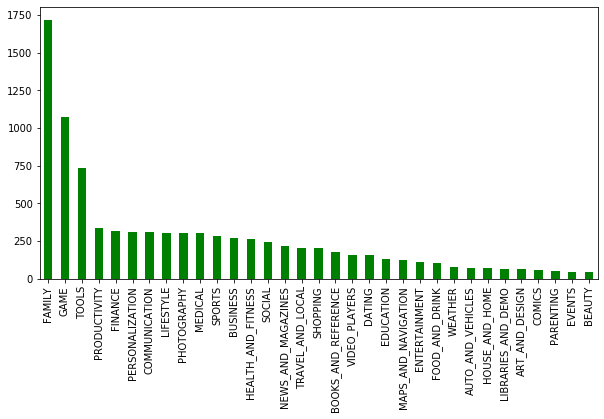

In [90]:
#Which categories have the most apps?
apps.Category.value_counts().plot('bar',color='g')  

#####  Family category has maximum number of apps 

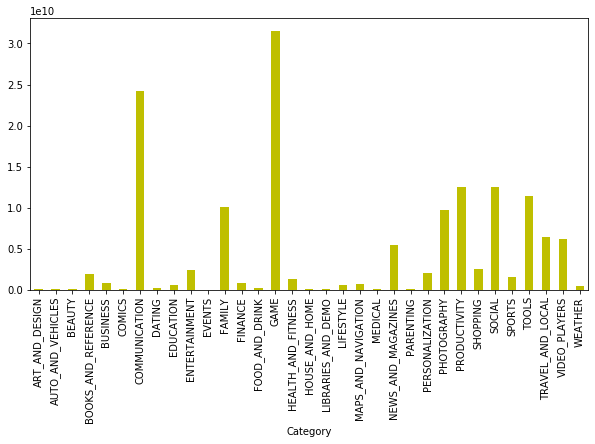

In [94]:
#Which categories are most popular (by installs)?
gb = apps.groupby('Category')
gb['Installs'].sum().plot('bar',color='y') 

#### Game category is the most popular category by Installs

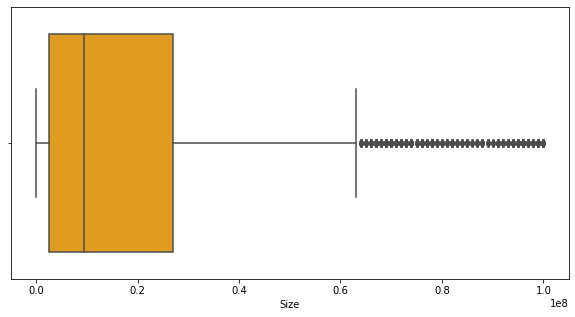

In [100]:
#What is the range of application size (using a boxplot)
#apps.Size.plot('box')
sns.boxplot(apps.Size,color='orange') 

#### The range lies between 0 and 0.625

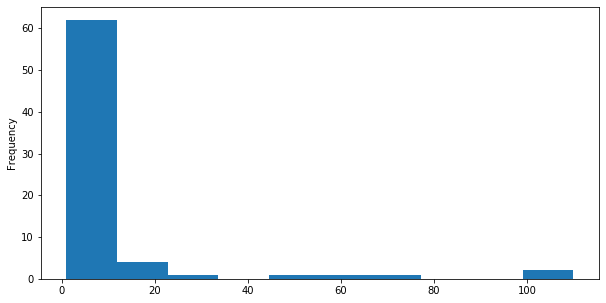

In [181]:
#distribution of price for paid apps only
#apps.Price.loc[apps['Type']=='Paid'].value_counts().plot('hist')
apps.Price.loc[apps['Type']=='Paid'].value_counts().plot('hist',x='Price',y='Frequency')

 #### Most of the paid apps cost below 20 Dollars . There are few costly apps which cost more than 100 Dollars

In [110]:
#No: of apps having multiple genres
#len(apps[apps['Genres'].str.count(';') >= 1])
len(apps.loc[apps.Genres.str.contains(';'),['App','Genres']])

447

#### There are 447 apps with moret han one Genres

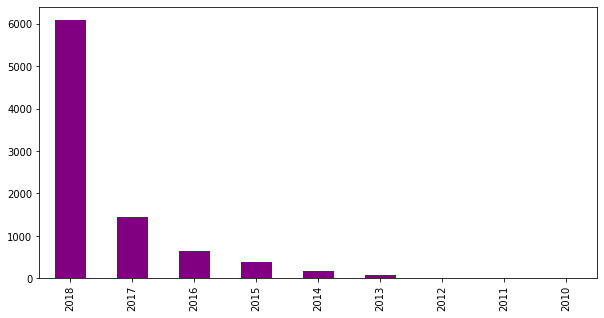

In [122]:
#Plot a bar chart for Last Updated by year

apps['Year'] = apps.LastUpdated.str[0:4].astype(int)

apps.Year.value_counts().plot(kind='bar',color='purple')

#apps['LastUpdated'].str[:4].astype(int).value_counts().plot(kind='bar',x='Last Updated Year')



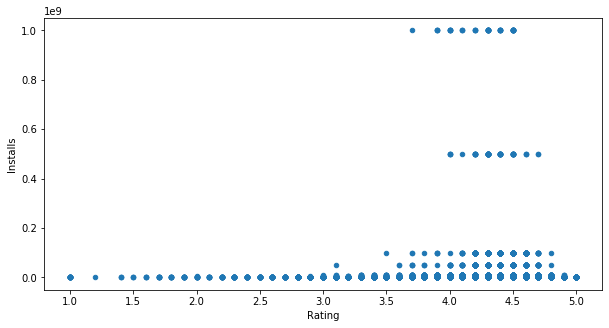

In [124]:
#scatter plot to show the relationship between rating and number of installs
apps.plot(kind='scatter',x='Rating',y='Installs')
#sns.scatterplot(apps.Rating,apps.Installs)

#### Highly rated apps have more installs

Type
Free    1.465552e+11
Paid    6.916148e+07
Name: Installs, dtype: float64


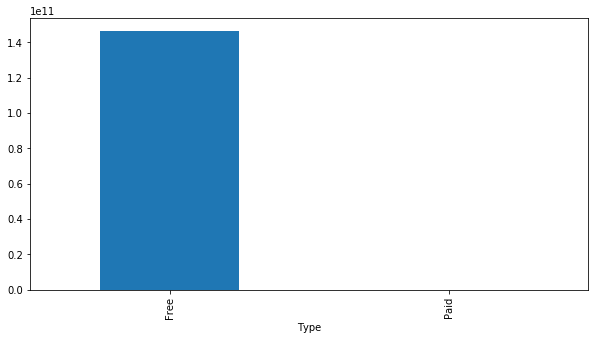

In [138]:
#Do free apps have more installs than paid apps on average?
grptype = apps.groupby('Type')
grptype['Installs'].sum().plot('bar')
print(grptype['Installs'].sum()) 

#### Yes, Free apps have more installs than paid apps

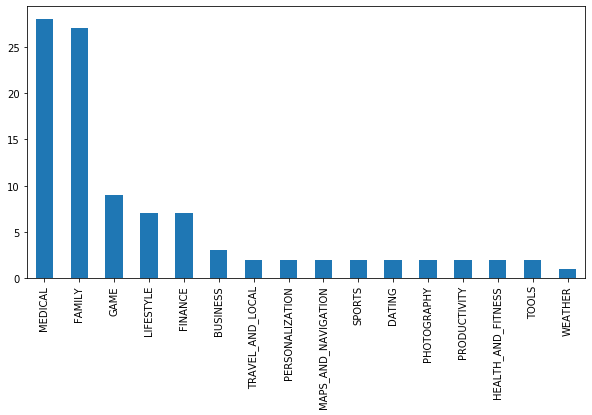

In [142]:
#Which categories appear the most among top 100 most expensive apps?
expensive_apps = apps.nlargest(100,'Price',keep='first')
expensive_apps.Category.value_counts().plot.bar()

#### Medical and Family apps are far expensive than other apps.

In [146]:
#Can you show the top 100 most common words that appear in apps name?
words = pd.Series(' '.join(apps['App']).lower().split())
words.value_counts()[:100].head(100)


-             1404
&              781
for            482
free           421
app            248
the            237
and            230
mobile         189
pro            168
video          163
live           157
photo          153
by             149
of             142
my             129
–              127
news           121
camera         119
2018           117
game           114
editor         113
chat           111
3d             106
games          103
theme           99
simulator       94
dating          94
calculator      94
2               93
to              93
              ... 
3               44
new             44
smart           44
sports          43
shopping        43
dr.             43
wallpapers      43
i               43
at              42
best            42
cv              42
phone           42
er              42
dx              41
x               40
super           40
coloring        40
world           40
guide           40
+               40
ex              39
all         

In [147]:
#pick a category that you like and do in-depth analysis on that category. For example: Game apps
game_apps = apps[apps['Category']=='GAME']
game_apps.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer,Year
1653,ROBLOX,GAME,4.5,4447388.0,6.7e+07,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,2018
1654,Subway Surfers,GAME,4.5,27722264.0,7.6e+07,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,2018
1655,Candy Crush Saga,GAME,4.4,22426677.0,7.4e+07,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,2018


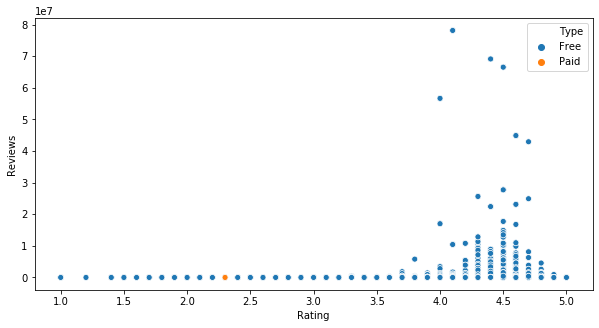

In [147]:
#Make a chart that shows the relationship between price, ratings and review.
reviews = apps[apps.Reviews!=0]
g = sns.scatterplot(x='Rating',y='Reviews',hue='Type', data=reviews)

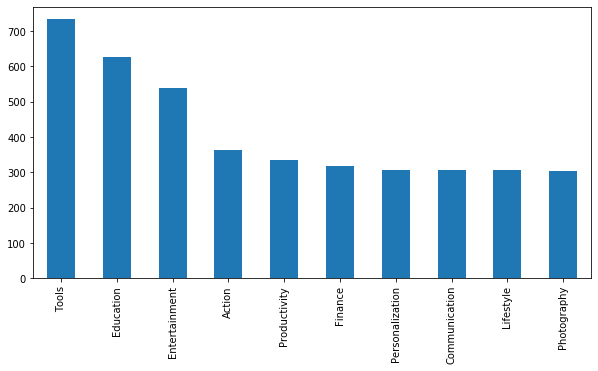

In [157]:
#What are the most popular genres?
pd.Series(';'.join(apps['Genres']).split(';')).value_counts()[:10].plot.bar()

#### The most popular Genres: Tools

In [161]:
#Are games that support more android devices more popular?
game_apps['AndroidVer'].unique()

array(['4.1 and up', '4.0.3 and up', '2.3 and up', '4.0 and up',
       '4.4 and up', '2.3.3 and up', '3.0 and up', 'Varies with device',
       '4.2 and up', '4.3 and up', '5.0 and up', '6.0 and up',
       '2.1 and up', '1.5 and up', '3.2 and up', '2.2 and up',
       '2.0 and up', '7.0 and up', '2.0.1 and up', '1.6 and up',
       '5.1 and up', '3.1 and up'], dtype=object)

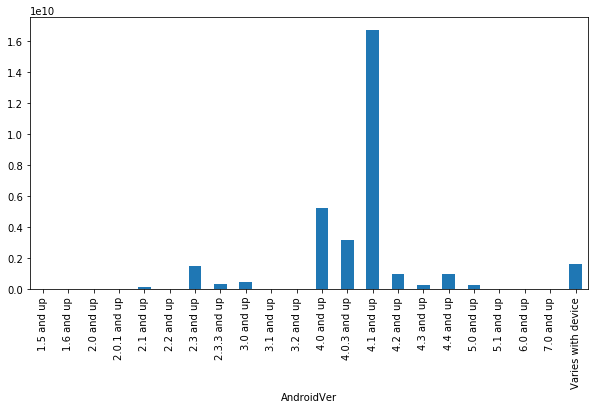

In [162]:
and_grp= game_apps.groupby('AndroidVer')
and_grp['Installs'].sum().plot('bar') 

#### Most popular android version: 4.1 and up

### Furthur Analysis of data

In [166]:
#More installed apps under game category
gbgame = game_apps.groupby('App')
gbgame['Installs'].sum()

App
1LINE – One Line with One Touch                        10000000.0
2-Player Co-op Zombie Shoot                                1000.0
211:CK                                                       10.0
211:CK Lite                                                  10.0
4 in a Row                                               500000.0
4 in a row                                              5000000.0
4x4 Jeep Racer                                          1000000.0
5 Nights at Cube Pizzeria City                           100000.0
7 Nights at Pixel Pizzeria - 2                          1000000.0
8 Ball Pool                                           600000000.0
AE 3D MOTOR :Racing Games Free                          5000000.0
AE 3D Moto 3                                             100000.0
AE Angry Chef                                             10000.0
AE Bingo: Offline Bingo Games                            500000.0
AE Blackjack                                             100000.0
AE Cit

In [167]:
#Which category has highest rating
apps.Category.loc[apps.Rating == apps.Rating.max()].unique()

array(['COMICS', 'DATING', 'EVENTS', 'LIBRARIES_AND_DEMO', 'MEDICAL',
       'TOOLS', 'PERSONALIZATION', 'BOOKS_AND_REFERENCE', 'LIFESTYLE',
       'SOCIAL', 'BUSINESS', 'NEWS_AND_MAGAZINES', 'PHOTOGRAPHY',
       'SHOPPING', 'FAMILY', 'FOOD_AND_DRINK', 'GAME', 'TRAVEL_AND_LOCAL',
       'FINANCE', 'HEALTH_AND_FITNESS', 'COMMUNICATION', 'PRODUCTIVITY',
       'SPORTS', 'PARENTING', 'ART_AND_DESIGN'], dtype=object)

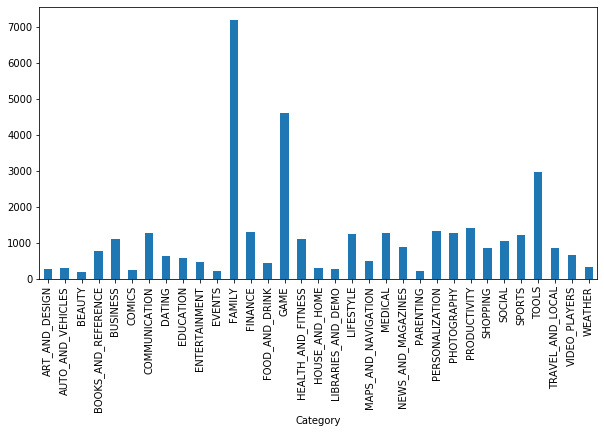

In [168]:
gb=apps.groupby('Category')
gb['Rating'].sum().plot('bar')

#### Family category has highest rating

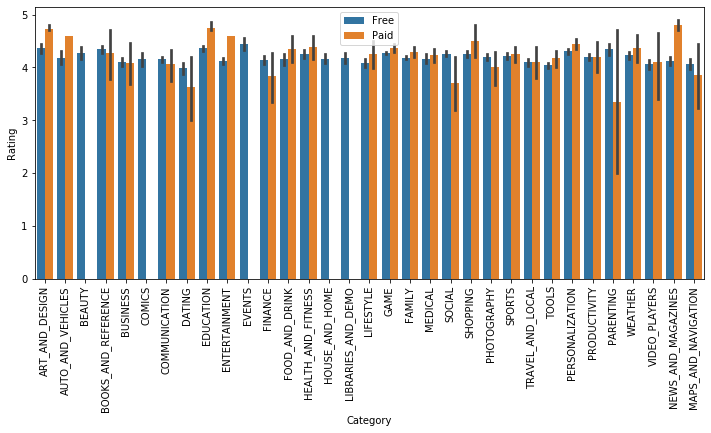

In [169]:
#No of app ratings based on category and type
plt.figure(figsize=(12,5))
ax=sns.barplot(x='Category',y='Rating',hue='Type',data=apps)
plt.xticks(rotation=90)
ax.legend()

In [170]:
#Average Rating of all apps
grpavg = apps.groupby('App')
#grpavg['Rating'].mean().plot('bar')
#plt.xticks(rotation=90)
grpavg['Rating'].mean()

App
+Download 4 Instagram Twitter                                                                                                        4.5
- Free Comics - Comic Apps                                                                                                           3.5
.R                                                                                                                                   4.5
/u/app                                                                                                                               4.7
058.ba                                                                                                                               4.4
1. FC Köln App                                                                                                                       4.6
10 Best Foods for You                                                                                                                4.0
10 Minutes a Day Times Tables        

In [171]:
#No: of apps have rating 5
len(apps[apps.Rating==5])

271

In [174]:
# 5 Most Reviewed apps
grpavg['Reviews'].sum().nlargest(5)

App
Instagram             199664676.0
Facebook              156286514.0
Subway Surfers        138606606.0
WhatsApp Messenger    138228988.0
Clash of Clans        134667058.0
Name: Reviews, dtype: float64

#### 5 Most Reviewed apps are as shown above

In [178]:
#percentage of free apps
print(apps.Type.value_counts())
print('Percentage of free apps: ',(apps.Type.value_counts()[0]/ apps.Type.count())*100)

Free    8275
Paid     611
Name: Type, dtype: int64
Percentage of free apps:  93.12401530497412


#### 93.12% of the total apps are free apps

In [179]:
#costliest App
print(apps.App.loc[apps.Price==apps.Price.max()])
apps.Price.max()

4367    I'm Rich - Trump Edition
Name: App, dtype: object


400.0

#### "I'm Rich - Trump Edition" is the most costly app. Cost= $400

(5.5, -0.5)

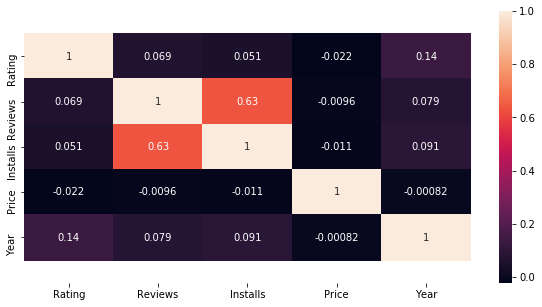

In [182]:
#Correlation Plot
ax=sns.heatmap(apps.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [183]:
#Group the data by category and explore the average rating
gb = apps.groupby('Category')
cat_mean = gb.mean()
cat_mean

,Rating,Reviews,Installs,Price,Year
Category,,,,,
ART_AND_DESIGN,4.377049,2.810356e+04,2.036526e+06,0.097869,2017.819672
AUTO_AND_VEHICLES,4.190411,1.594014e+04,7.278055e+05,0.027260,2017.794521
BEAUTY,4.278571,9.407929e+03,6.408619e+05,0.000000,2017.761905
BOOKS_AND_REFERENCE,4.347458,1.235752e+05,1.082651e+07,0.134915,2017.180791
BUSINESS,4.102593,4.576928e+04,3.198215e+06,0.238556,2017.392593
COMICS,4.155172,5.830940e+04,9.661397e+05,0.000000,2017.775862
COMMUNICATION,4.151466,1.958544e+06,7.867180e+07,0.184658,2017.426710
DATING,3.971698,3.487525e+04,1.298883e+06,0.144403,2017.880503
EDUCATION,4.375969,1.795715e+05,4.138388e+06,0.139225,2017.410853


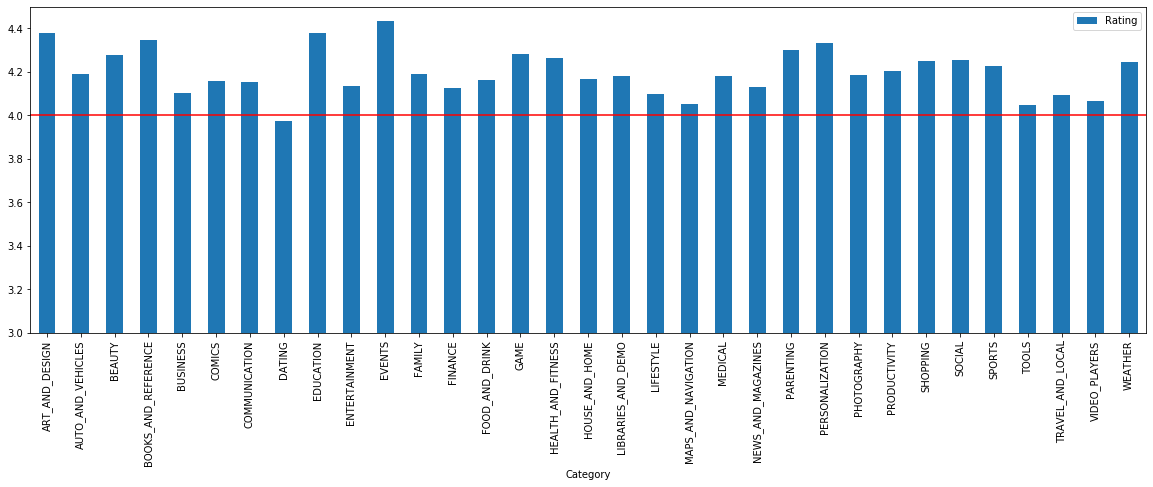

In [184]:
rating = cat_mean.plot(kind='bar', y='Rating', figsize=(20,6))

rating.set_ylim(3, 4.5)

rating.axhline(y=4, color='r')

We can see that Events apps are usually rated very high in the market. Other highly rated categories are Art, Books and Education.

All categories except Dating apps have an average rating above 4. It could either be that people are often frustrated with dating apps, or that these apps tend to have poor design and functionality.